In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# EDA

<AxesSubplot:xlabel='class', ylabel='count'>

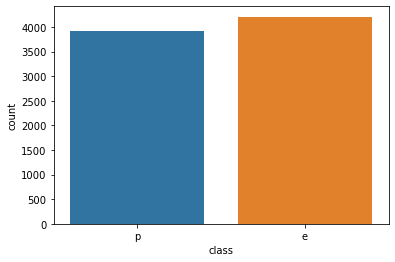

In [4]:
sns.countplot(data=df,x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


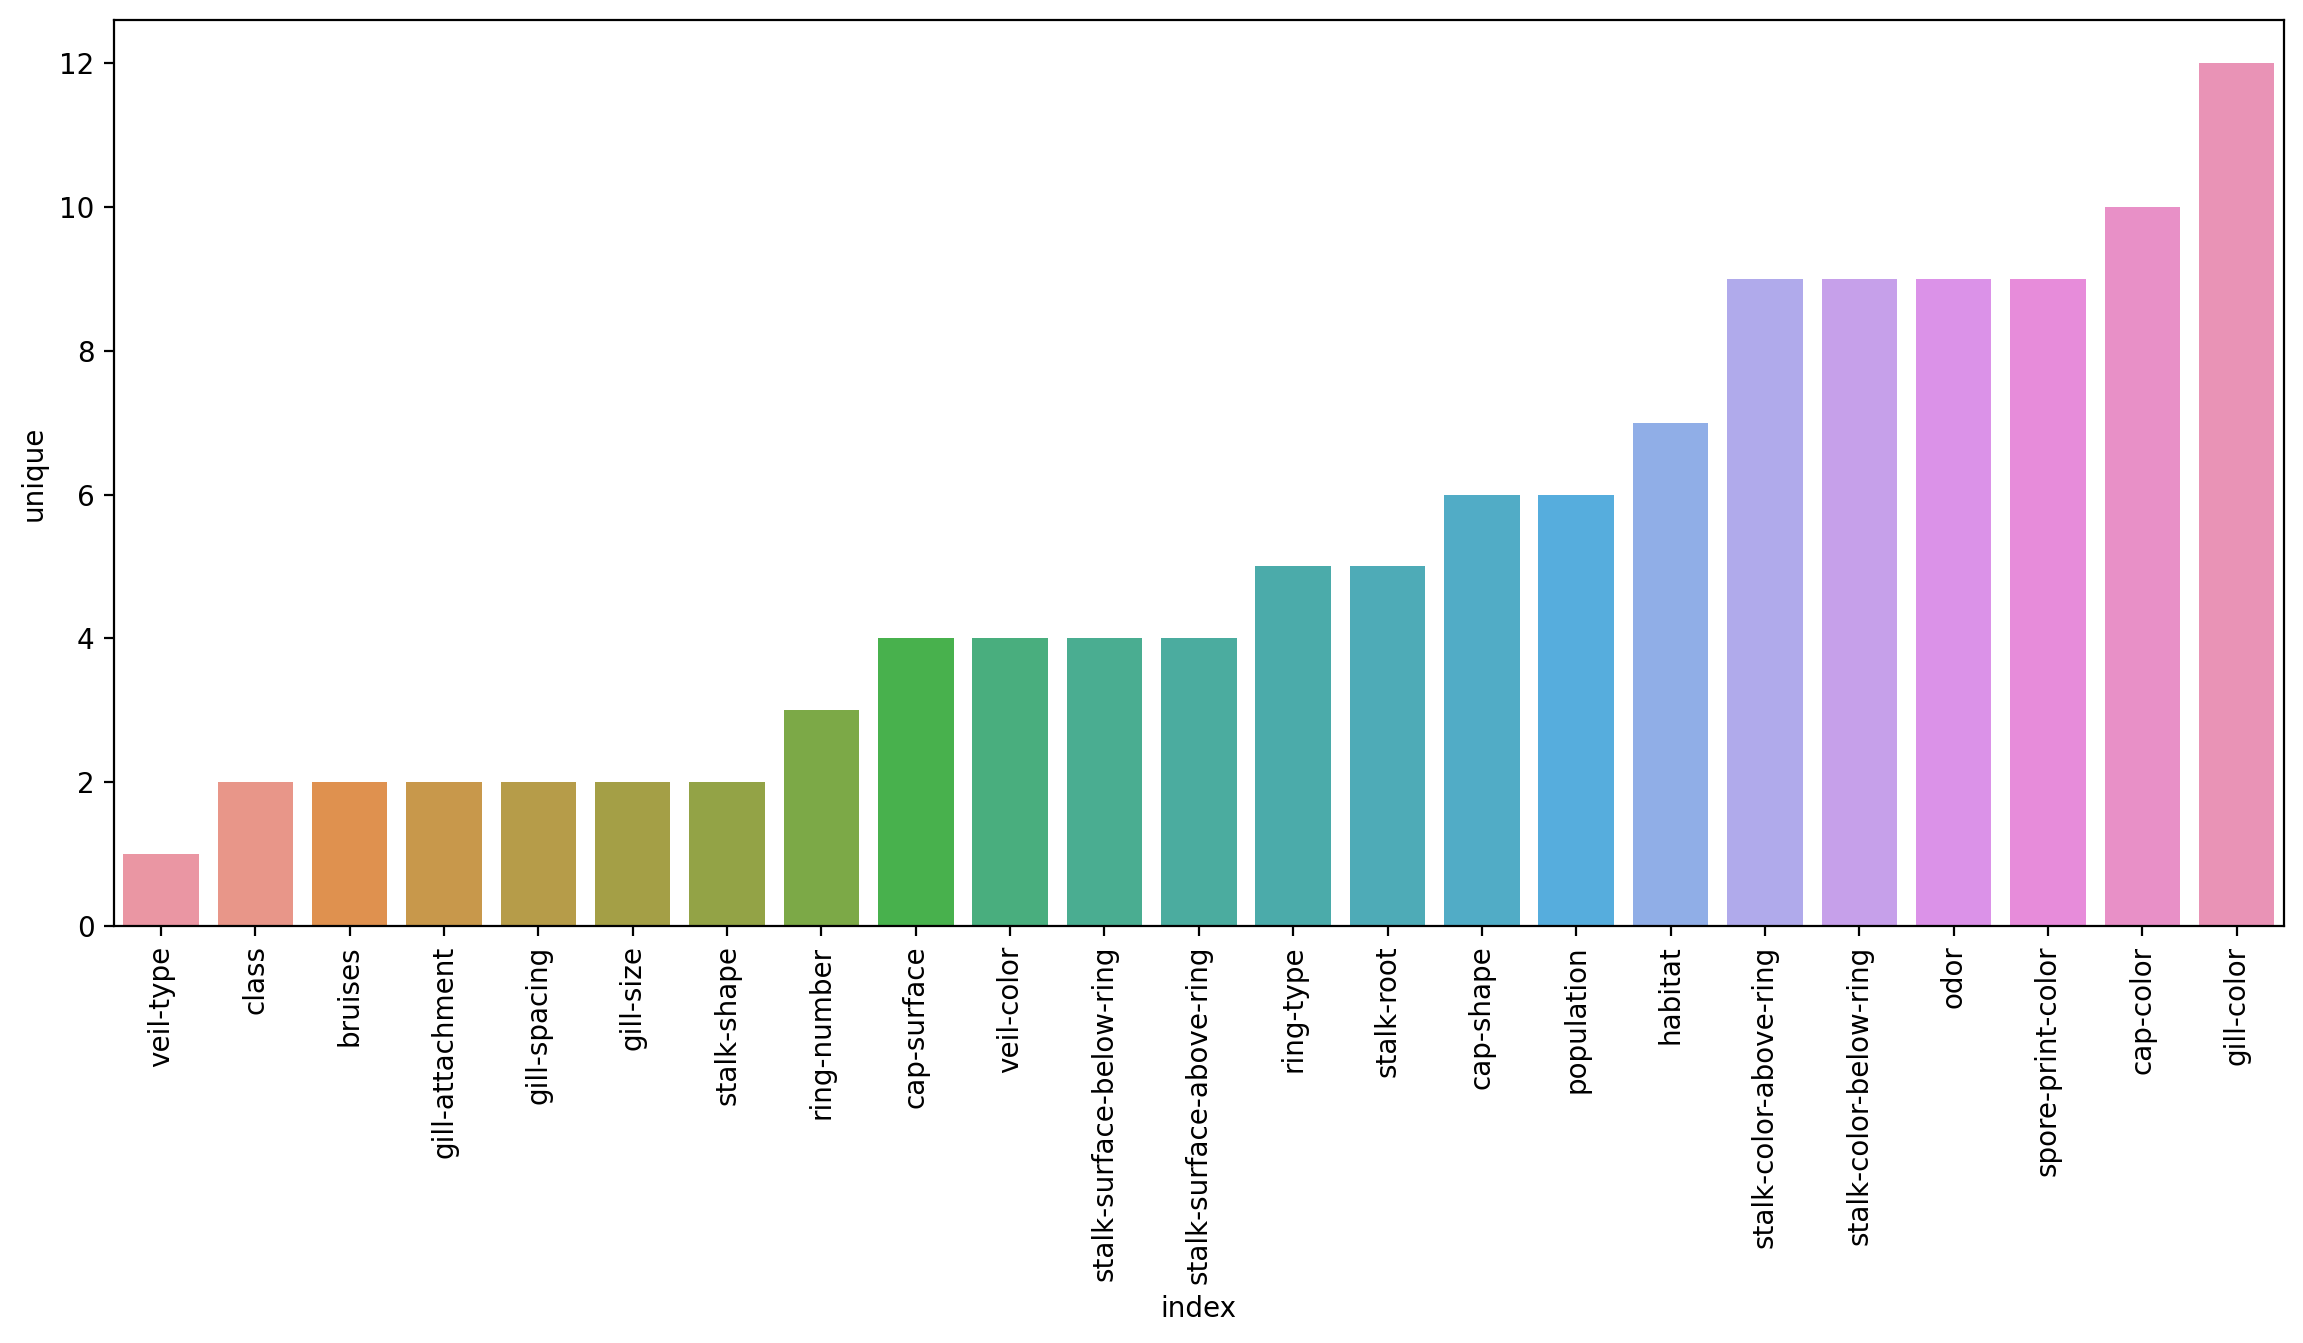

In [10]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

# Train Test Split

In [11]:
#X=df.drop('class',axis=1)

In [12]:
#X=pd.get_dummies(X,drop_first=True)

In [13]:
X=pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y=df['class']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.15,random_state=42)

# Modeling

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
model=AdaBoostClassifier(n_estimators=1)

In [17]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

# Evaluation

In [18]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [19]:
predictions=model.predict(X_test)

In [20]:
accuracy_score(y_test,predictions)

0.8835110746513536

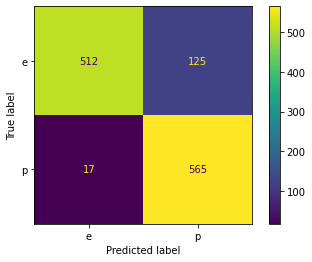

In [21]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.97      0.80      0.88       637
           p       0.82      0.97      0.89       582

    accuracy                           0.88      1219
   macro avg       0.89      0.89      0.88      1219
weighted avg       0.90      0.88      0.88      1219



In [23]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Analyzing Performance as more weak learners are added

In [24]:
error_rates=[]

for n in range (1,96):
    
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    err=1-accuracy_score(y_test,preds)
    
    error_rates.append(err)

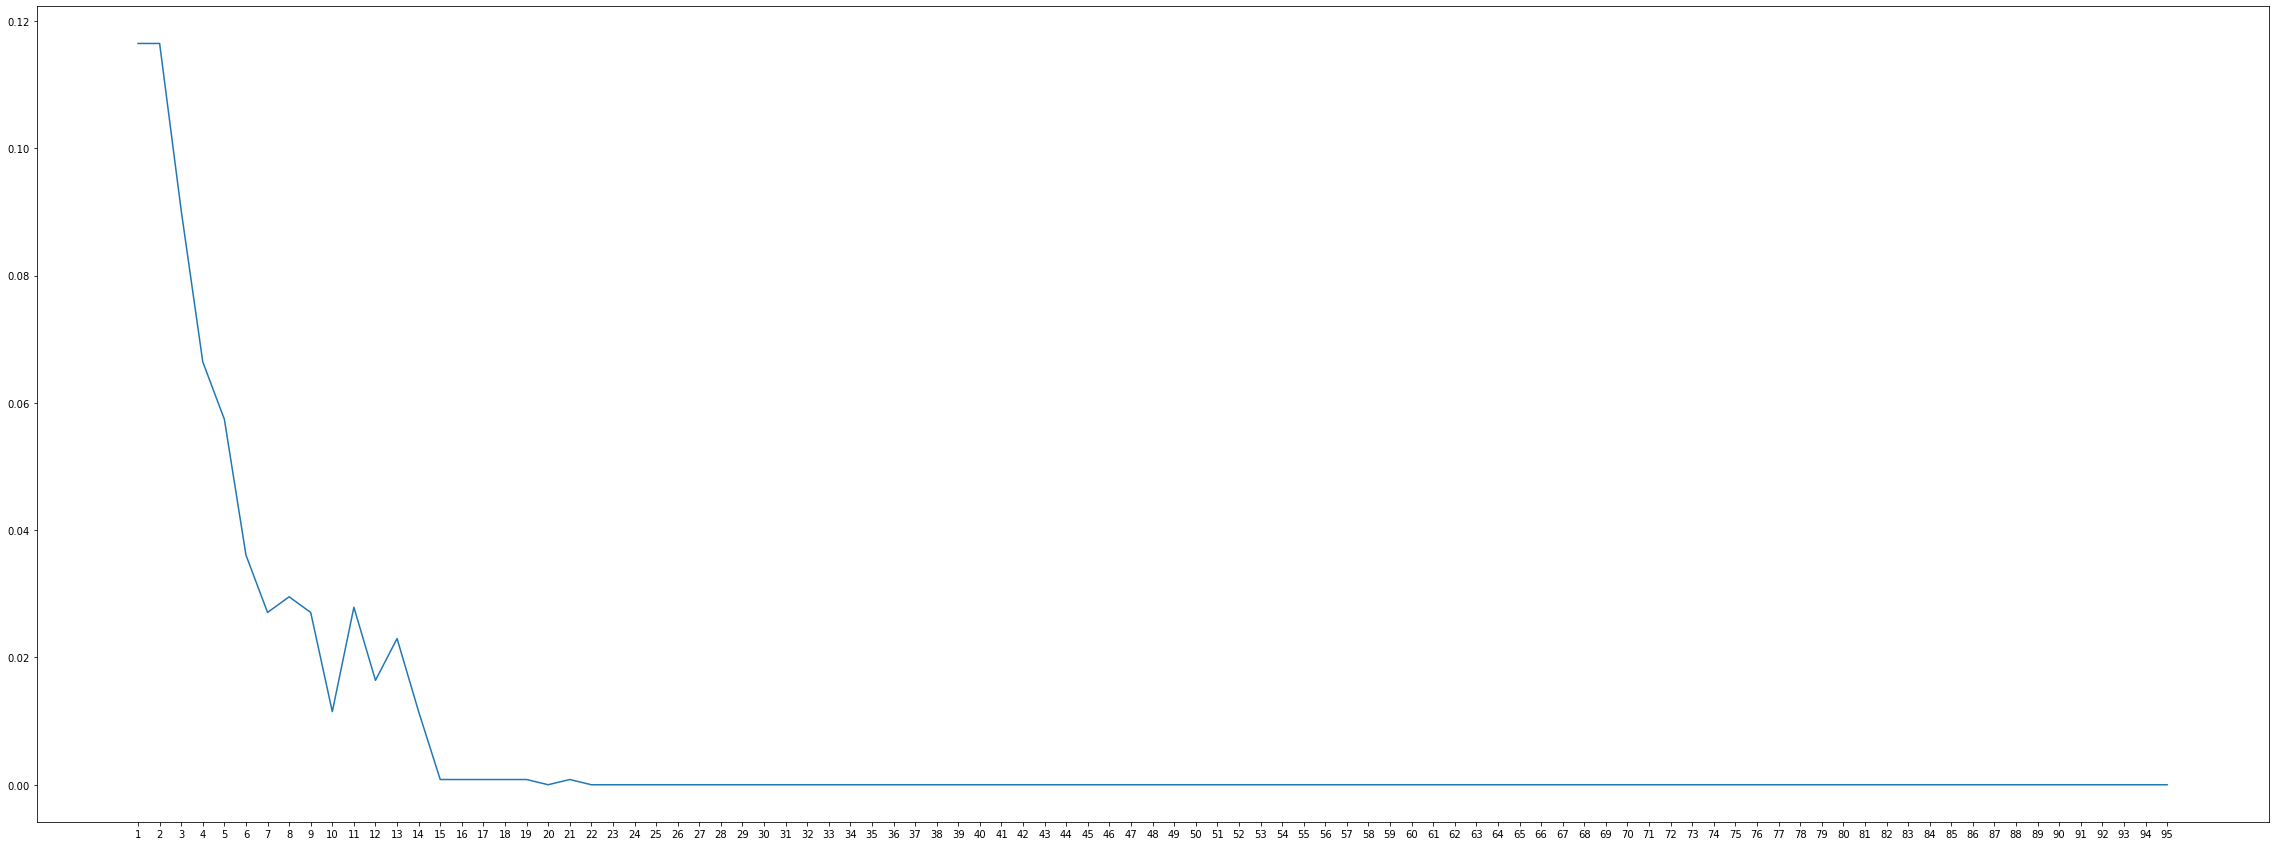

In [25]:
plt.figure(figsize=(40,15))
plt.plot(range(1,96),error_rates)
plt.xticks(list(range(1,96)))
plt.show()

# Final Model


In [27]:
final_model=AdaBoostClassifier(n_estimators=17)
final_model.fit(X_train,y_train)

preds_train=final_model.predict(X_train)
preds_test=final_model.predict(X_test)

print('Train Accuracy Score:', accuracy_score(y_train,preds_train))
print("Test Accuracy Score:",accuracy_score(y_test,preds_test))

Train Accuracy Score: 0.9989862418537292
Test Accuracy Score: 0.9991796554552912


In [28]:
final_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.        , 0.        , 0.11764706, 0.05882353, 0.        ,
       0.        , 0.        , 0.05882353, 0.17647059, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05882353, 0.        , 0.        , 0.        , 0.        ,
       0.05882353, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [34]:
feats=pd.DataFrame(index=X.columns,data=final_model.feature_importances_,columns=['Importance'])
feats

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [35]:
imp_feats=feats[feats['Importance']>0]

In [36]:
imp_feats.sort_values("Importance")

,Importance
odor_c,0.058824
odor_f,0.058824
odor_p,0.058824
gill-spacing_w,0.058824
stalk-shape_t,0.058824
stalk-surface-above-ring_k,0.058824
ring-type_p,0.058824
spore-print-color_r,0.058824
spore-print-color_w,0.058824
population_c,0.058824


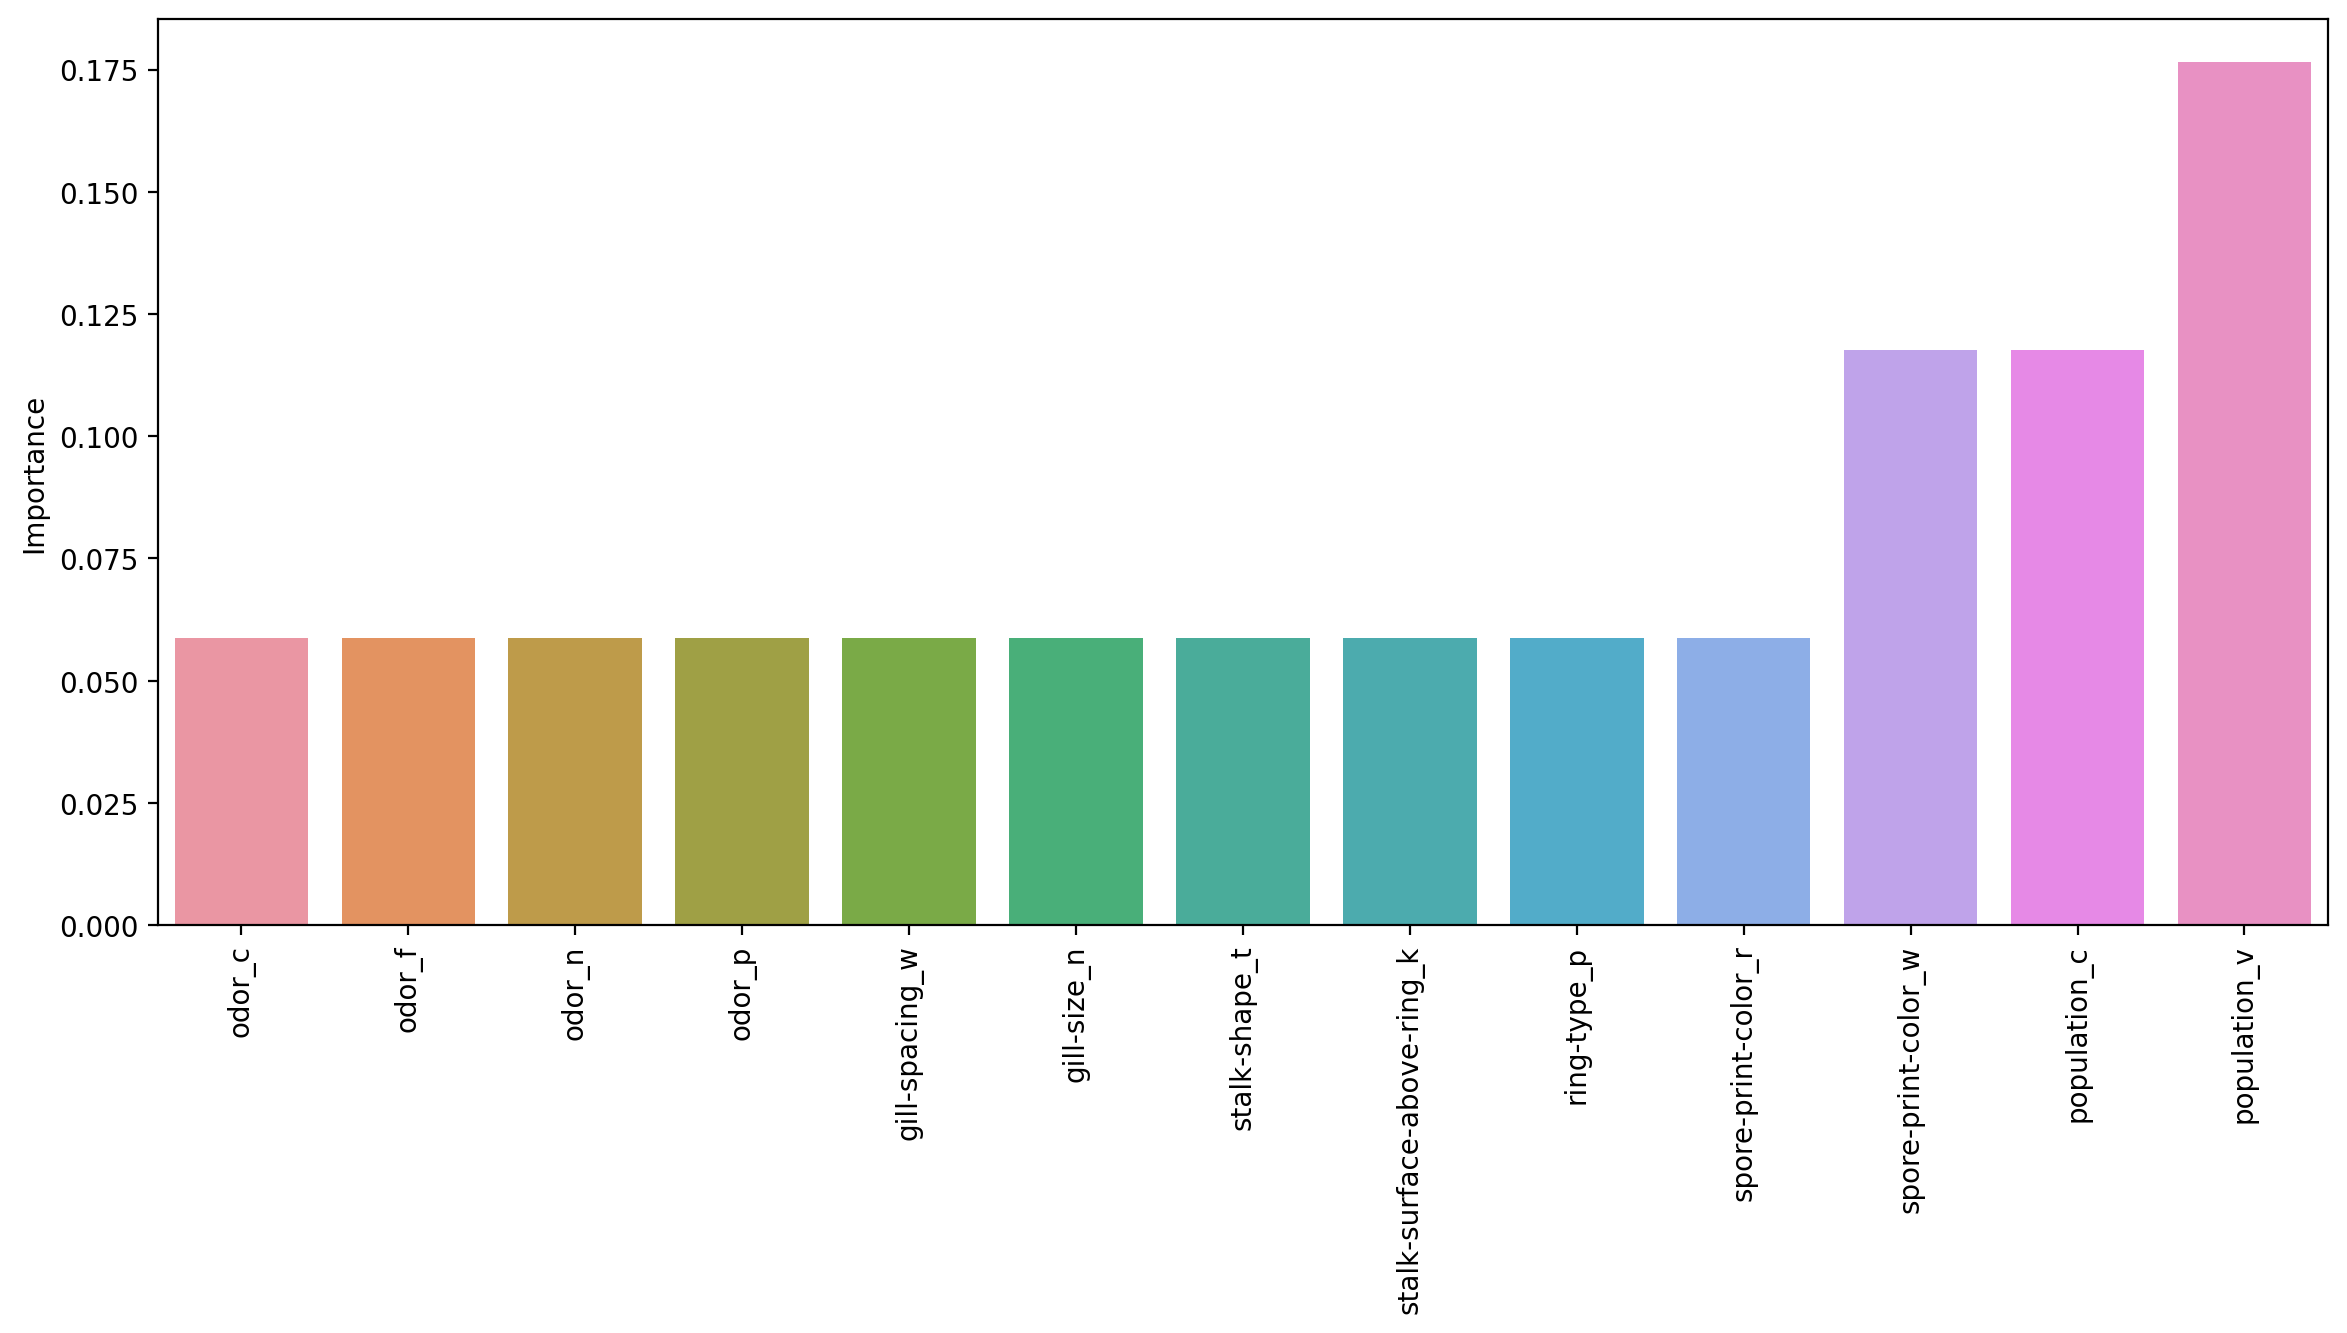

In [38]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90)
plt.show()